In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.nonparametric.api as nparam
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.model_selection import train_test_split

In [2]:
n = 1000
p = 0.9
a=1
b=1

In [3]:
class dataset:
    def __init__(self,n,p,df):
        #Number of observations
        self.n = n
        #MCAR Bernoulli prob.
        self.p = p
        #data set 
        self.df = df 
        
    #Ishigami function
        #np.random.seed(24)   
    
    def ishigami(self):
        return lambda a, b:  np.sin(self.df['X1']) + a * np.sin(self.df['X2'])**2 + b * (self.df['X3'])**4 * np.sin(self.df['X1']) + np.random.normal(0, 0.01, self.n)
    
    def toyreg(self):
        return lambda b1,b2: b1*self.df['X1'] + b2*self.df['X2'] + np.random.normal(0, 0.01, self.n)
    
    #H-Sample with target from Ishigami function
    
    def h_df(self,a,b):
        self.df['Y'] = self.ishigami()(a,b)
        return np.array(self.df['Y'])
    
    def picked(self,request,a,b):
        #request are the variables to be randomized, e.g. ['X2','X3']
        newdf = self.df.copy()
        values  = [list(pd.Series(np.random.uniform(0,1,self.n)))]*len(request)
        dictionary = dict(zip(request, values))
        for col, new_values in dictionary.items():
            newdf = newdf.assign(**{col: new_values})
        return newdf
    
    def mcar(self,a,b):
        #self.df['Y'] = self.ishigami()(a,b)
        mask = np.random.binomial(size=(self.n,3), n=1, p= self.p) == 1
        mask = np.reshape(mask,(self.n,3))
        #print(mask)
        df1 = self.df.where(mask,np.nan)
        #print(df1)
        return df1.dropna()
    
    def mar(self,cond1,cond2):
        cond_x = np.where((self.df['X1'] <0.5) , 0, 1) # & or (self.df['X3'] <0.1)
        omega = (np.random.binomial(size=(self.n,1), n=1, p= p) == 1)  #omega.shape 
        omega = np.reshape(omega,(self.n,))
        condition = (omega & (cond_x  ==1)) | (cond_x  ==0)
        self.df['X3'] = np.where(condition,np.array(self.df['X3']),np.nan)
        return self.df.dropna()
        

In [4]:
df   = pd.DataFrame(np.random.uniform(0,1,size=(n, 3)),columns=['X1','X2','X3'])
cc = dataset(n,p,df).mcar(a,b)

#df['Y'] = dataset(n,p,df).h_df(a,b)
#cc['Y'] = dataset(len(cc),p,cc).h_df(a,b)

In [5]:
#MCAR Missing values in the predictor 

0.4
The data set is reduced to 73observations.
0.75
The data set is reduced to 420observations.
0.9
The data set is reduced to 735observations.


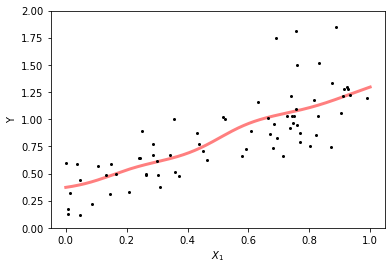

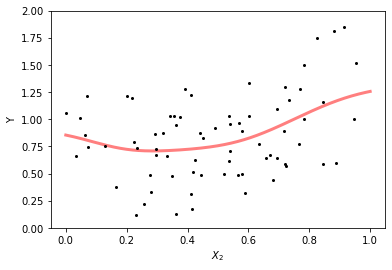

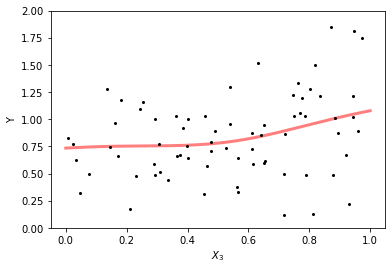

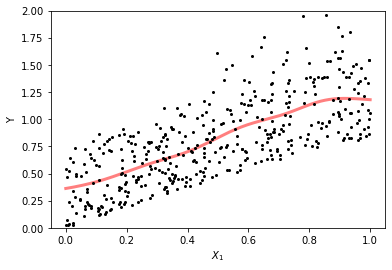

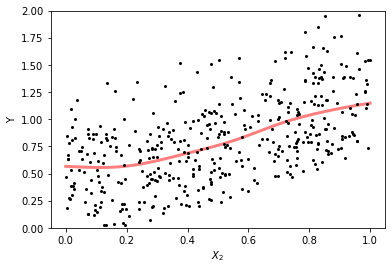

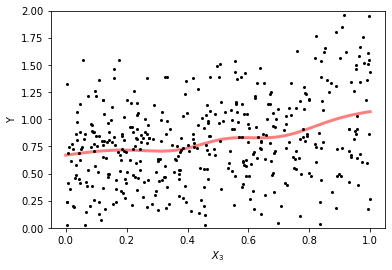

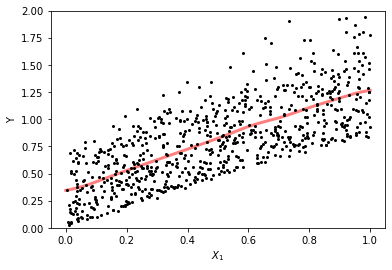

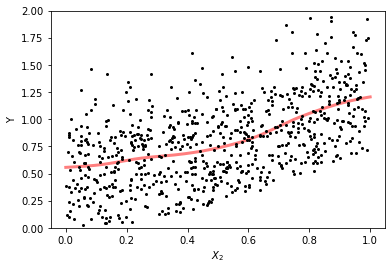

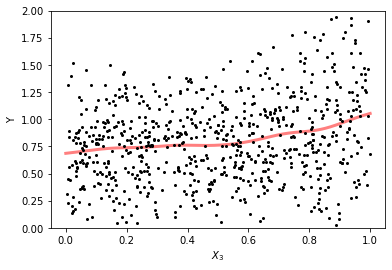

In [6]:
for p in [0.4,0.75,0.9]:
    print(p)
    df   = pd.DataFrame(np.random.uniform(0,1,size=(n, 3)),columns=['X1','X2','X3'])
    cc = dataset(n,p,df).mcar(a,b)
    print('The data set is reduced to '+ str(len(cc))+'observations.')
    
    df['Y'] = dataset(n,p,df).h_df(a,b)
    cc['Y'] = dataset(len(cc),p,cc).h_df(a,b)
    
    #H-Sample


    for x in ['X1','X2','X3']:
        X_pred = np.linspace(0, 1, n)
        model= KernelReg(endog=[df['Y'].to_numpy()],exog=[df[x]],reg_type='lc',var_type='c', bw='cv_ls')
        Y_pred, _ = model.fit(X_pred)
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.plot(X_pred, Y_pred, alpha=0.5,lw=3,c='purple')
        ax.plot(df[x],df['Y'],'o',c='darkgrey',markersize=2)
        ax.set_xlabel(f'${x[0]}_{x[1:]}$')
        ax.set_ylabel('Y')
        plt.close(fig)
        fig.savefig('/Users/lilimatic/sobol_missing/images/regression/missing predictor mcar/H-Sample regression part '+str(x)+' in predictor.pdf',transparent=True,bbox_inches='tight')
    
    #MCAR PREDICTORS
    
    for x in ['X1','X2','X3']:
        X_pred = np.linspace(0, 1, n)
        model_cc= KernelReg(endog=[cc['Y'].to_numpy()],exog=[cc[x]],reg_type='lc',var_type='c', bw='cv_ls')
        Y_pred_cc, _ = model_cc.fit(X_pred)
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.plot(X_pred, Y_pred_cc, alpha=0.5,lw=3,c='red')
        ax.plot(cc[x],cc['Y'],'o',c='black',markersize=2)
        ax.set_xlabel(f'${x[0]}_{x[1:]}$')
        ax.set_xlabel(f'${x[0]}_{x[1:]}$') 
        ax.set_ylabel('Y')
        ax.set_ylim((0,2))
        #plt.close(fig)
        fig.savefig('/Users/lilimatic/sobol_missing/images/regression/missing predictor mcar/CC regression part '+str(x)+' in predictor for p='+str(p)+'.pdf',transparent=True,bbox_inches='tight')
    

### Missing values in the response $Y$

In [7]:
p = 0.75

df   = pd.DataFrame(np.random.uniform(0,1,size=(n, 3)),columns=['X1','X2','X3'])
df['Y'] = dataset(n,p,df).h_df(a,b)

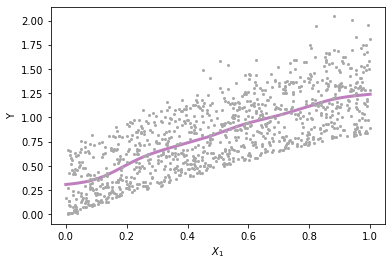

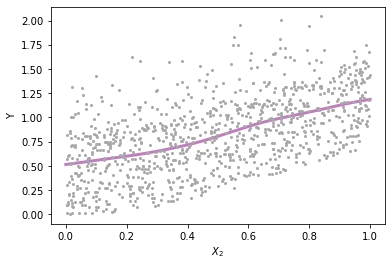

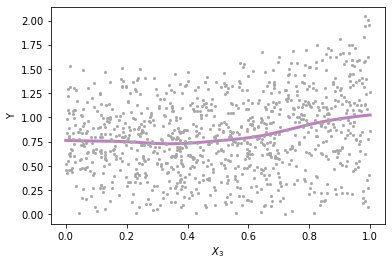

In [8]:
for x in ['X1','X2','X3']:
        X_pred = np.linspace(0, 1, n)
        model= KernelReg(endog=[df['Y'].to_numpy()],exog=[df[x]],reg_type='lc',var_type='c', bw='cv_ls')
        Y_pred, _ = model.fit(X_pred)
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.plot(X_pred, Y_pred, alpha=0.5,lw=3,c='purple')
        ax.plot(df[x],df['Y'],'o',c='darkgrey',markersize=2)
        ax.set_xlabel(f'${x[0]}_{x[1:]}$')
        ax.set_ylabel('Y')
        #plt.close(fig)
        fig.savefig('/Users/lilimatic/sobol_missing/images/regression/missing response/H-Sample regression part '+str(x)+' in the response.pdf',transparent=True,bbox_inches='tight')
        

#### MCAR Missing values in the response $Y$

In [9]:
omega = (np.random.binomial(size=(n,1), n=1, p= p) == 1)
omega = np.reshape(omega,(n,))
condition = omega 

df_ymcar = df.copy()
df_ymcar['Y'] = np.where(condition,np.array(df_ymcar['Y']),np.nan)
df_ymcar = df_ymcar.dropna()

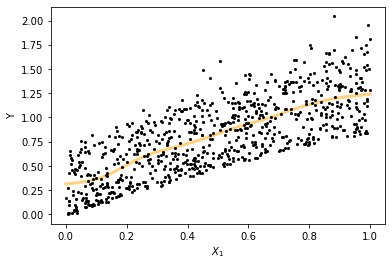

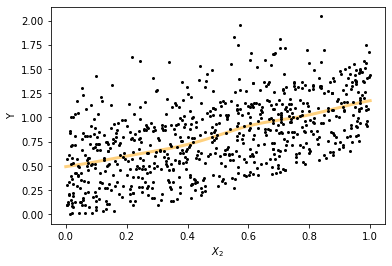

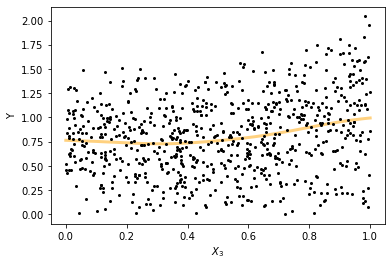

In [10]:
for x in ['X1','X2','X3']:
    X_pred = np.linspace(0, 1, len(df_ymcar))
    model_ymcar= KernelReg(endog=[df_ymcar['Y'].to_numpy()],exog=[df_ymcar[x]],reg_type='lc',var_type='c', bw='cv_ls')
    Y_pred_mcar, _ = model_ymcar.fit(X_pred)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(X_pred, Y_pred_mcar, alpha=0.5,lw=3,c='orange')
    ax.plot(df_ymcar[x],df_ymcar['Y'],'o',c='black',markersize=2)
    ax.set_xlabel(f'${x[0]}_{x[1:]}$')
    ax.set_ylabel('Y')
    #plt.close(fig)
    fig.savefig('/Users/lilimatic/sobol_missing/images/regression/missing response/mcar/CC MCAR regression part '+str(x)+' in response.pdf',transparent=True,bbox_inches='tight')
    

In [11]:
len(df_ymcar)

755

### MAR Missing values in the response $Y$

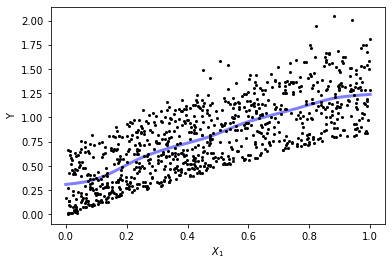

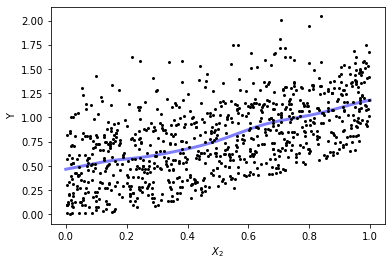

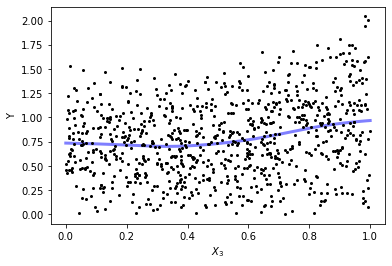

In [12]:
cond_mar = np.where((df['X1'] <0.5) , 0, 1)
omega = (np.random.binomial(size=(n,1), n=1, p= p) == 1)
omega = np.reshape(omega,(n,))
condition = (omega & (cond_mar==1)) | (cond_mar==0)

df_ymar = df.copy()
df_ymar['Y'] = np.where(condition,np.array(df_ymar['Y']),np.nan)
df_ymar = df_ymar.dropna()

for x in ['X1','X2','X3']:
    X_pred = np.linspace(0, 1, len(df_ymar))
    model_ymar= KernelReg(endog=[df_ymar['Y'].to_numpy()],exog=[df_ymar[x]],reg_type='lc',var_type='c', bw='cv_ls')
    Y_pred_mar, _ = model_ymar.fit(X_pred)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(X_pred, Y_pred_mar, alpha=0.5,lw=3,c='blue')
    ax.plot(df_ymar[x],df_ymar['Y'],'o',c='black',markersize=2)
    ax.set_xlabel(f'${x[0]}_{x[1:]}$')
    ax.set_ylabel('Y')
    #plt.close(fig)
    fig.savefig('/Users/lilimatic/sobol_missing/images/regression/missing response/mar/CC MAR regression part '+str(x)+' in response.pdf',transparent=True,bbox_inches='tight')
    

In [13]:
len(df_ymar)

872

### MNAR Missing values in the response $Y$

In [14]:
cond_mar = np.where((df['Y'] <1) , 0, 1)
omega = (np.random.binomial(size=(n,1), n=1, p= p) == 1)
omega = np.reshape(omega,(n,))
condition = (omega & (cond_mar==1)) | (cond_mar==0)

df_ymnar = df.copy()

df_ymnar['Y'] = np.where(condition,np.array(df_ymnar['Y']),np.nan)

df_ymnar = df_ymnar.dropna()

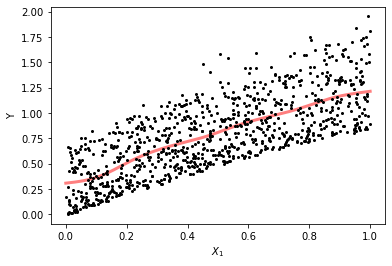

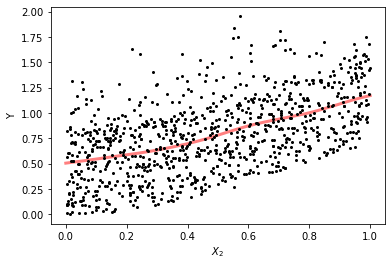

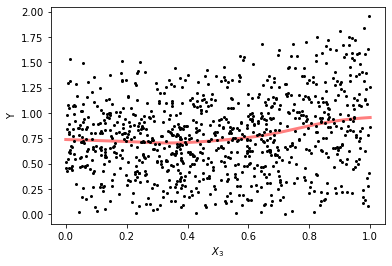

In [15]:
for x in ['X1','X2','X3']:
    X_pred = np.linspace(0, 1, len(df_ymnar))
    model_ymnar= KernelReg(endog=[df_ymnar['Y'].to_numpy()],exog=[df_ymnar[x]],reg_type='lc',var_type='c', bw='cv_ls')
    Y_pred_mnar, _ = model_ymnar.fit(X_pred)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(X_pred, Y_pred_mnar, alpha=0.5,lw=3,c='red')
    ax.plot(df_ymnar[x],df_ymnar['Y'],'o',c='black',markersize=2)
    ax.set_xlabel(f'${x[0]}_{x[1:]}$')
    ax.set_ylabel('Y')
    #plt.close(fig)
    fig.savefig('/Users/lilimatic/sobol_missing/images/regression/missing response/mnar/CC MNAR regression part '+str(x)+' in response.pdf',transparent=True,bbox_inches='tight')
    

In [16]:
len(df_ymnar)   

920